Project Description:
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated 

Statement of problem:
To predict Medical insurance costs

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset has 1,338 rows and 7 columns

In [3]:
#Importing the dataset
df1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The output indicates no null values in the dataset

<Axes: >

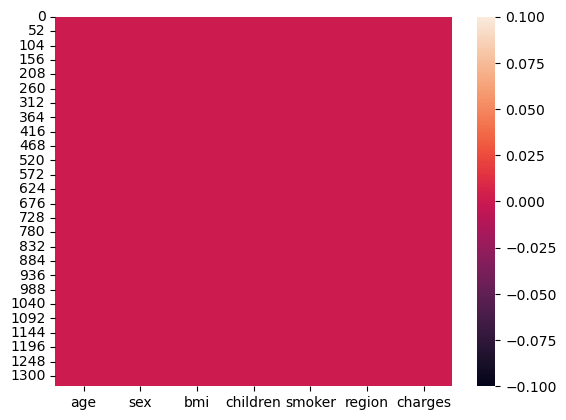

In [8]:
#Visualization of null value using heatmap
sns.heatmap(df.isnull())

The heatmap show visualized output that indicates no null value in the dataset

In [9]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The describe function show the data distribution through counts, mean, standard deviation, minimum and maximum value, as well as  Q1, Q2(median) and Q3 of the its distribution

<Axes: >

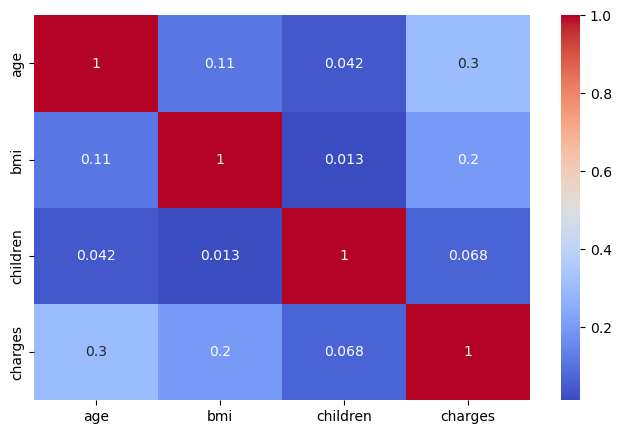

In [10]:
# Visualizing the Correlation Matrix
corr = df1.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')

Correlation output of the dataset to determine which variable has really influence the insurance cost most or in what order.
the observation suggests age and bmi as the most influencing variables in this regards. However, this function works for numeric data only. other variables such as sex, smoker and region could be significant too.

In [11]:
#Show in ascending order the correlation of variables with charges 
corr = df1.corr()
corr['charges'].sort_values(ascending = False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

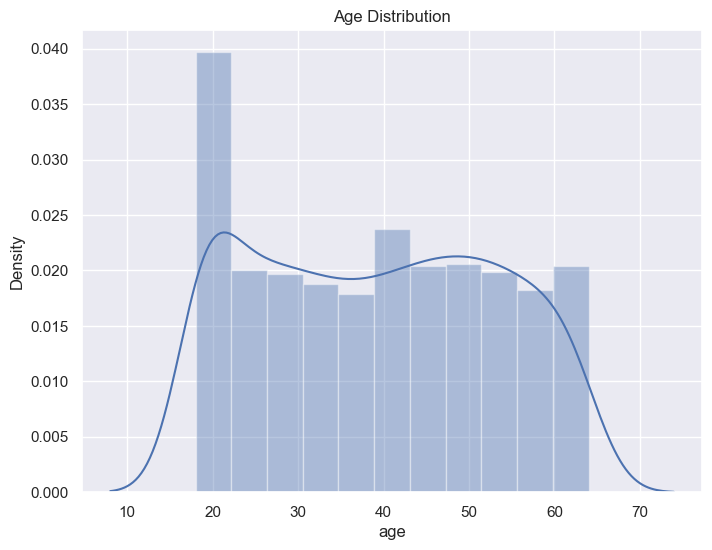

In [12]:
#Showing the distribution of numeric variables - Age
sns.set()
plt.figure(figsize=(8, 6))
sns.distplot(df1['age'])
plt.title('Age Distribution')
plt.show()

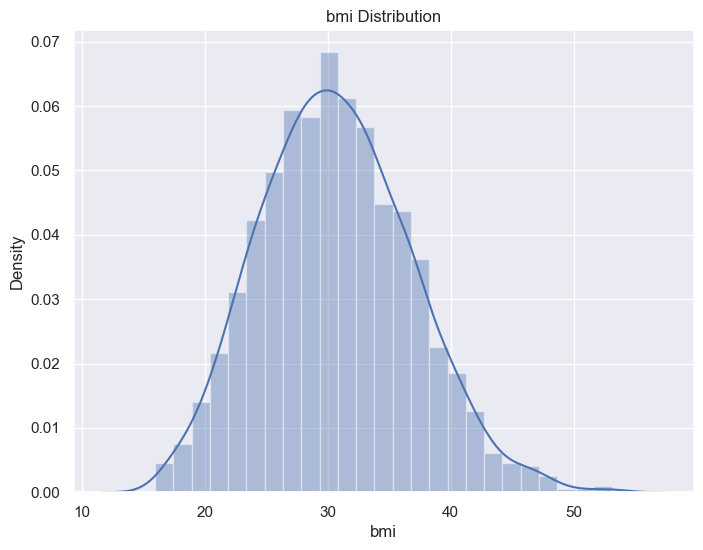

In [13]:
#Showing the distribution of numeric variables - bmi
sns.set()
plt.figure(figsize=(8, 6))
sns.distplot(df1['bmi'])
plt.title('bmi Distribution')
plt.show()

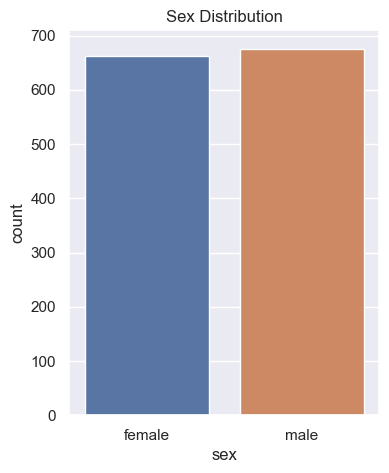

male      676
female    662
Name: sex, dtype: int64

In [14]:
#Distribution of category variables - Sex(gender)
plt.figure(figsize=(4, 5))
sns.countplot(x = 'sex', data=df1)
plt.title('Sex Distribution')
plt.show()
df1['sex'].value_counts()

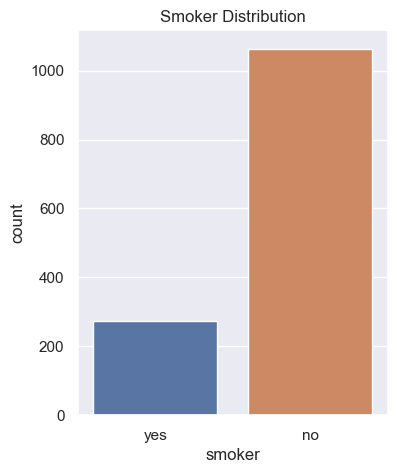

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
#Distribution of category variables - Smoker
plt.figure(figsize=(4, 5))
sns.countplot(x = 'smoker', data=df)
plt.title('Smoker Distribution')
plt.show()
df['smoker'].value_counts()

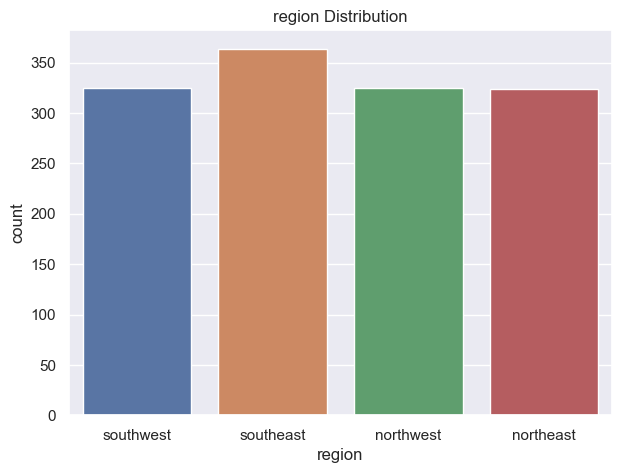

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
#Distribution of category variables - region
plt.figure(figsize=(7, 5))
sns.countplot(x = 'region', data=df1)
plt.title('region Distribution')
plt.show()
df1['region'].value_counts()

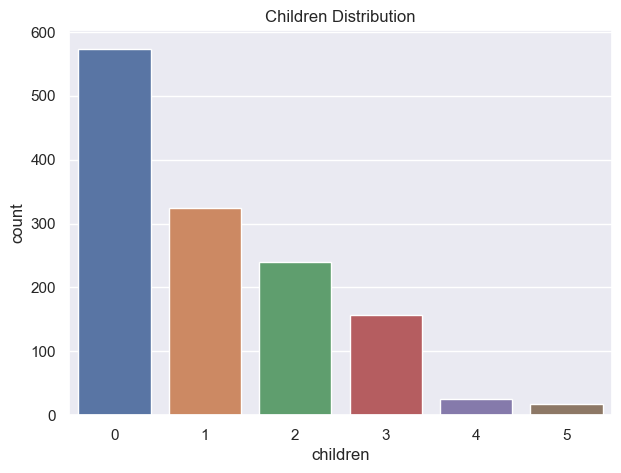

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [17]:
#Distribution of category variables - Children
plt.figure(figsize=(7, 5))
sns.countplot(x = 'children', data=df1)
plt.title('Children Distribution')
plt.show()
df1['children'].value_counts()

Pre-processing and Encoding categorical columns(variables) for better analysis

In [18]:
#encoding Sex column
df1.replace ({'sex':{'male':1, 'female':0}}, inplace=True)

#encoding Smoker column
df1.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)

#encoding region column
df1.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace=True)

We decode the aforementioned categorical varaibles into numeric as follows:
1. sex - male = 1, female = 0
2. smoker - yes = 1, No = 0
3. region - o, 1, 2, and 3 will replace 'southeast, 'southwest', 'northwest, 'northeast' respectively

In [19]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


The dataframe is now shown those category columns as encoded for numeric value

In [20]:
#Spliting the varaiables in x and y for the model, remove columns with low corrlations(region)
X = df1.drop(['charges', 'region'], axis=1)
Y = df1.charges

In [21]:
print(X)

      age  sex     bmi  children  smoker
0      19    0  27.900         0       1
1      18    1  33.770         1       0
2      28    1  33.000         3       0
3      33    1  22.705         0       0
4      32    1  28.880         0       0
...   ...  ...     ...       ...     ...
1333   50    1  30.970         3       0
1334   18    0  31.920         0       0
1335   18    0  36.850         0       0
1336   21    0  25.800         0       0
1337   61    0  29.070         0       1

[1338 rows x 5 columns]


In [22]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [23]:
# spliting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, Y_test.shape)

(1338, 5) (1070, 5) (268,)


In [25]:
#Training of the LinearRegression model for the predictions

#Loading the regression
regressor = LinearRegression()

In [26]:
regressor.fit(X_train, Y_train)

LinearRegression()

 Model Evaluation


In [27]:
#prediction based on training data
train_data_pred = regressor.predict(X_train)

In [28]:
# determine R-square value
r2_train = metrics.r2_score(Y_train, train_data_pred)
print('R Squared :', r2_train) 

R Squared : 0.7511416233816596


In [29]:
#prediction based on testing data
train_data_pred = regressor.predict(X_test)

In [30]:
# determine R-square value
r2_test = metrics.r2_score(Y_test, train_data_pred)
print('R Squared :', r2_test)

R Squared : 0.7428803779811103


The results show that both test and train data have almost equal R square value approx. 75% which validates the strenght of the model and predictions base of the trained data.

In [31]:
# saving the model using .pkl
import joblib
joblib.dump(regressor, "Medical insurance cost prediction.pkl")

['Medical insurance cost prediction.pkl']

In [32]:
#Predict the saved model
model = joblib.load("Medical insurance cost prediction.pkl")

In [33]:
#Prediction
prediction = model.predict(X_test)
prediction

array([ 1.47210748e+03,  1.14636462e+04,  1.00143532e+04,  2.56676107e+03,
        7.88398794e+03,  1.12622544e+04,  3.25280640e+03,  6.24826810e+02,
        1.19593631e+04,  9.27578009e+03,  1.13684673e+04,  5.11710470e+03,
        3.03249444e+04,  9.60656949e+00,  1.22320622e+04,  1.35861822e+04,
        3.75182356e+03,  7.53422753e+03,  2.97817354e+04,  2.23529727e+03,
        1.21801070e+04,  2.38951835e+03,  3.45257902e+04,  3.16252424e+04,
        3.05238870e+04,  9.22595359e+03,  1.87141090e+03,  1.54373516e+04,
        6.58757274e+03,  1.84981337e+03,  9.70856557e+03,  5.45368639e+03,
        4.59955694e+03,  4.74248037e+03,  9.97967169e+03,  4.81173014e+03,
        3.00134206e+04,  6.90314481e+03,  2.71127918e+04,  1.43179159e+04,
        5.62770481e+01,  2.84561832e+04,  7.59907728e+03,  1.61075824e+03,
        1.05232874e+04,  8.07796659e+03,  1.13311898e+04,  8.39843885e+03,
        1.09259994e+04,  1.38358726e+04,  5.65619847e+03, -5.41351162e+02,
        2.59920350e+04,  

The outpout provides the predicted cost of medical insurance

In [34]:
#checking the prediction with original value
a = np.array(Y_test)
df1 = pd.DataFrame()
df1["Predicted"] = prediction
df1["Original"] = a
df1

,Predicted,Original
0,1472.107481,2395.17155
1,11463.646164,11286.53870
2,10014.353222,9617.66245
3,2566.761066,1719.43630
4,7883.987944,8891.13950
...,...,...
263,-1451.839775,1727.78500
264,15505.501638,11566.30055
265,36631.707996,29141.36030
266,13243.218064,8978.18510


In [50]:
# To predict a medical insurance cost for a new customer using the model
# we need to add the new customer's data into the dataframe
data = {'age': 50, 'sex': 1, 'bmi': 25, 'children' :3, 'smoker': 1}
index = [0]
new_cust_df = pd.DataFrame(data, index)
new_cust_df

,age,sex,bmi,children,smoker
0,50,1,25,3,1


In [51]:
# predicting the cost of medical insurance
cost_pred = regressor.predict(new_cust_df)
print("The Cost of medical Insurance to new Customer is: ", cost_pred)

The Cost of medical Insurance to new Customer is:  [34302.68323884]


In [56]:
# Changing the data of the new customer with ( children = 1 and Smoker = 0)
data2 = {'age': 45, 'sex': 1, 'bmi': 25, 'children' :1, 'smoker': 0}
index = [0]
new_cust_df2 = pd.DataFrame(data2, index)
new_cust_df2

,age,sex,bmi,children,smoker
0,45,1,25,1,0


In [57]:
# predicting the cost of medical insurance
cost_pred = regressor.predict(new_cust_df2)
print("The Cost of medical Insurance to new Customer is: ", cost_pred)

The Cost of medical Insurance to new Customer is:  [7969.71601834]


Conclision
It can be seen that a reduction difference in medical insurance cost when (age, & no of children) are lower and not a smoker from $34,302 to $7969. This suggests a strong influence roles play by attibutes of Age, no of Children and smoking status in determining the medical insurance cost.

# End